In [205]:
import pandas as pd
import numpy as np
from rich.jupyter import display
from torch.distributions.constraints import positive

In [206]:
data = pd.read_csv("sp500_returns_with_tickers.csv", index_col="date")
data.head()

,ACF,ABK,AMT,JAVA,AN,ORCL,MSFT,SDS,AYE,TROW,...,CFN,AVGO,VRSK,DG.2,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
1960-01-29,0.005155,-0.015000,-0.020785,NaN,-0.092262,NaN,NaN,NaN,-0.020833,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-29,0.046154,0.017767,0.009434,NaN,-0.021312,NaN,NaN,NaN,0.053192,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-31,-0.059553,-0.100249,-0.047170,NaN,0.038851,NaN,NaN,NaN,-0.005387,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-29,-0.081794,-0.056180,0.000000,NaN,-0.050407,NaN,NaN,NaN,0.010274,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-31,0.048851,-0.029762,-0.034654,NaN,0.029110,NaN,NaN,NaN,0.044068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
cap_data = pd.read_csv("sp500_market_caps.csv", index_col="date")
cap_data.head()

,ACF,ABK,AMT,JAVA,AN,ORCL,MSFT,SDS,AYE,TROW,...,CFN,AVGO,VRSK,DG.2,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
1960-01-29,69127.50,79982.0,26500.0,NaN,298061.250,NaN,NaN,NaN,316404.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-29,71431.75,81403.0,26500.0,NaN,289266.000,NaN,NaN,NaN,333234.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-31,67177.75,72268.0,25250.0,NaN,300504.375,NaN,NaN,NaN,327624.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-29,61683.00,68208.0,25250.0,NaN,285357.000,NaN,NaN,NaN,330990.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-31,63810.00,66178.0,24125.0,NaN,291220.500,NaN,NaN,NaN,345576.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
cap_data = cap_data * 1000
cap_data.tail()
len(cap_data.columns)

1863

In [209]:
cap_data_numeric = cap_data.apply(pd.to_numeric, errors='coerce')
cap_data_numeric = cap_data_numeric.fillna(0)
weight_data = cap_data_numeric.div(cap_data_numeric.sum(axis=1), axis=0)
row_sums = weight_data.sum(axis=1)
print(row_sums.head())
weight_data.tail()

date
1960-01-29    1.0
1960-02-29    1.0
1960-03-31    1.0
1960-04-29    1.0
1960-05-31    1.0
dtype: float64


,ACF,ABK,AMT,JAVA,AN,ORCL,MSFT,SDS,AYE,TROW,...,CFN,AVGO,VRSK,DG.2,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.0,0.0,0.0,0.0,0.007886,0.062798,0.0,0.0,0.000478,...,0.0,0.015402,0.000787,0.000370,0.001188,0.0,0.000191,0.0,0.000435,0.013853
2024-09-30,0.0,0.0,0.0,0.0,0.0,0.009342,0.063290,0.0,0.0,0.000479,...,0.0,0.015940,0.000750,0.000368,0.001175,0.0,0.000189,0.0,0.000424,0.016600
2024-10-31,0.0,0.0,0.0,0.0,0.0,0.009296,0.060384,0.0,0.0,0.000488,...,0.0,0.015848,0.000775,0.000352,0.001204,0.0,0.000199,0.0,0.000447,0.016030
2024-11-29,0.0,0.0,0.0,0.0,0.0,0.009664,0.059402,0.0,0.0,0.000519,...,0.0,0.014330,0.000784,0.000321,0.001375,0.0,0.000211,0.0,0.000426,0.020905
2024-12-31,0.0,0.0,0.0,0.0,0.0,0.008986,0.060421,0.0,0.0,0.000484,...,0.0,0.020946,0.000750,0.000321,0.001396,0.0,0.000178,0.0,0.000394,0.024994


In [210]:
# (1) Make sure the columns match and are aligned:
data = data[weight_data.columns]

data_numeric = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Now compute returns:
sp500_returns = (data_numeric * weight_data).sum(axis=1)

sp500_returns

date
1960-01-29   -0.067093
1960-02-29    0.017111
1960-03-31   -0.010623
1960-04-29   -0.013724
1960-05-31    0.037913
1960-06-30    0.024465
1960-07-29   -0.020780
1960-08-31    0.033255
1960-09-30   -0.056724
1960-10-31    0.001031
1960-11-30    0.048571
1960-12-30    0.051409
1961-01-31    0.067360
1961-02-28    0.035567
1961-03-30    0.031878
1961-04-28    0.007485
1961-05-31    0.026529
1961-06-30   -0.024477
1961-07-31    0.035537
1961-08-31    0.027347
1961-09-29   -0.015551
1961-10-31    0.031770
1961-11-30    0.047806
1961-12-29    0.007193
1962-01-31   -0.034626
1962-02-28    0.022283
1962-03-30   -0.002405
1962-04-30   -0.059418
1962-05-31   -0.077488
1962-06-29   -0.078536
1962-07-31    0.068335
1962-08-31    0.023435
1962-09-28   -0.046948
1962-10-31    0.010181
1962-11-30    0.110884
1962-12-31    0.017363
1963-01-31    0.052116
1963-02-28   -0.022955
1963-03-29    0.037949
1963-04-30    0.050570
1963-05-31    0.021848
1963-06-28   -0.017172
1963-07-31   -0.000584
1963-0

In [211]:
active_mask = cap_data_numeric > 0

# Number of active stocks per month:
n_active_stocks = active_mask.sum(axis=1)

# Equal weight data:
equal_weight_data = active_mask.div(n_active_stocks, axis=0)

# Equal-weighted SP500 returns:
sp500_ew_returns = (data_numeric * equal_weight_data).sum(axis=1)

# Optional: Check
print(sp500_ew_returns.head())

date
1960-01-29   -0.049087
1960-02-29    0.007490
1960-03-31   -0.025784
1960-04-29   -0.015902
1960-05-31    0.025842
dtype: float64


In [212]:
innovation_returns = sp500_returns - sp500_ew_returns
innovation_weights = weight_data - equal_weight_data
innovation_weights.tail()

,ACF,ABK,AMT,JAVA,AN,ORCL,MSFT,SDS,AYE,TROW,...,CFN,AVGO,VRSK,DG.2,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.0,0.0,0.0,0.0,0.005898,0.060810,0.0,0.0,-0.001510,...,0.0,0.013414,-0.001201,-0.001619,-0.000800,0.0,-0.001797,0.0,-0.001553,0.011865
2024-09-30,0.0,0.0,0.0,0.0,0.0,0.007358,0.061306,0.0,0.0,-0.001505,...,0.0,0.013956,-0.001235,-0.001616,-0.000809,0.0,-0.001795,0.0,-0.001560,0.014616
2024-10-31,0.0,0.0,0.0,0.0,0.0,0.007308,0.058396,0.0,0.0,-0.001500,...,0.0,0.013860,-0.001213,-0.001636,-0.000784,0.0,-0.001789,0.0,-0.001541,0.014042
2024-11-29,0.0,0.0,0.0,0.0,0.0,0.007676,0.057414,0.0,0.0,-0.001469,...,0.0,0.012342,-0.001204,-0.001667,-0.000614,0.0,-0.001777,0.0,-0.001562,0.018917
2024-12-31,0.0,0.0,0.0,0.0,0.0,0.006998,0.058433,0.0,0.0,-0.001504,...,0.0,0.018958,-0.001238,-0.001667,-0.000592,0.0,-0.001810,0.0,-0.001594,0.023006


In [213]:
positive_weights = innovation_weights.clip(lower=0).sum(axis=1)
negative_weights = innovation_weights.clip(upper=0).sum(axis=1)

weight_summary_df = pd.DataFrame({
    "Positive": positive_weights,
    "Negative": negative_weights
})

pd.set_option('display.max_rows', None)
weight_summary_df

,Positive,Negative
date,,
1960-01-29,0.563187,-0.563187
1960-02-29,0.564233,-0.564233
1960-03-31,0.566024,-0.566024
1960-04-29,0.564973,-0.564973
1960-05-31,0.566462,-0.566462
1960-06-30,0.566126,-0.566126
1960-07-29,0.564622,-0.564622
1960-08-31,0.564784,-0.564784
1960-09-30,0.564311,-0.564311


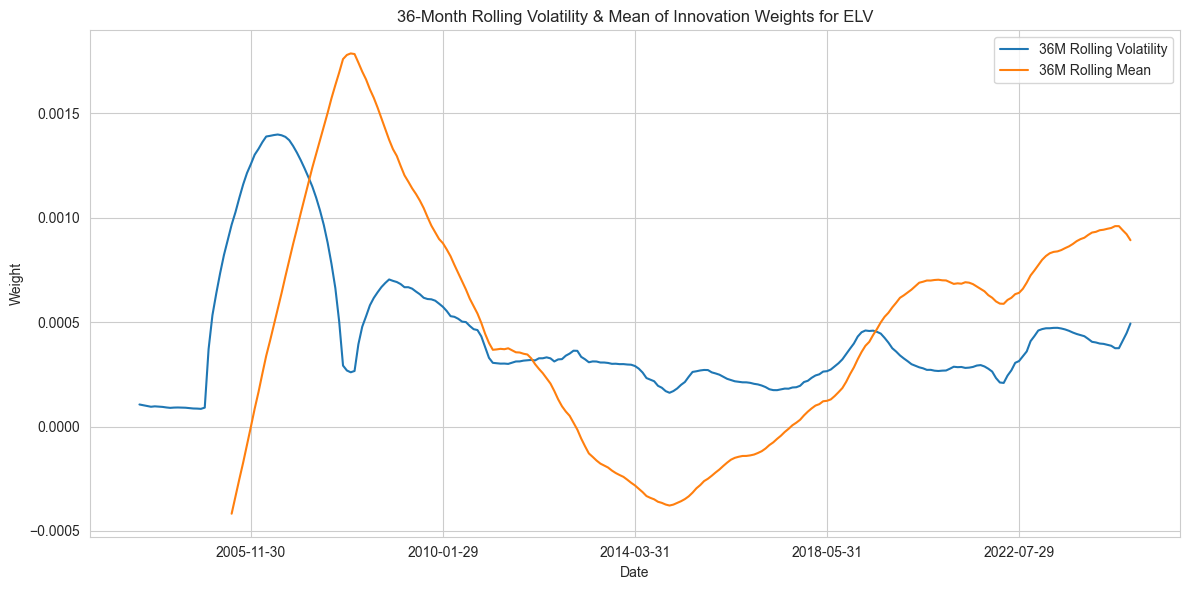

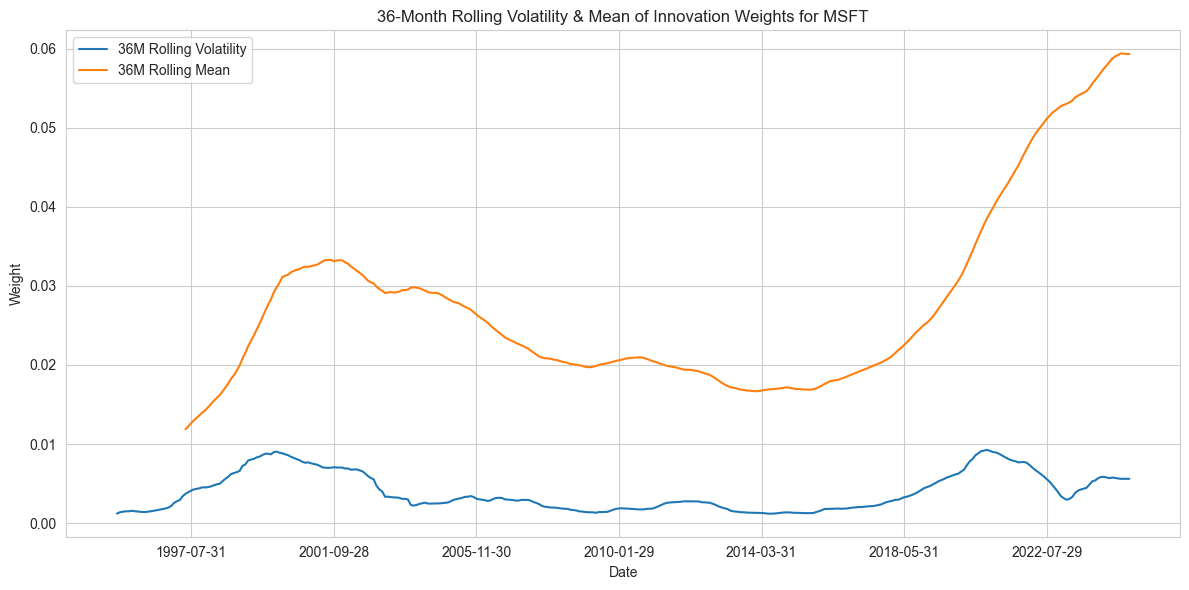

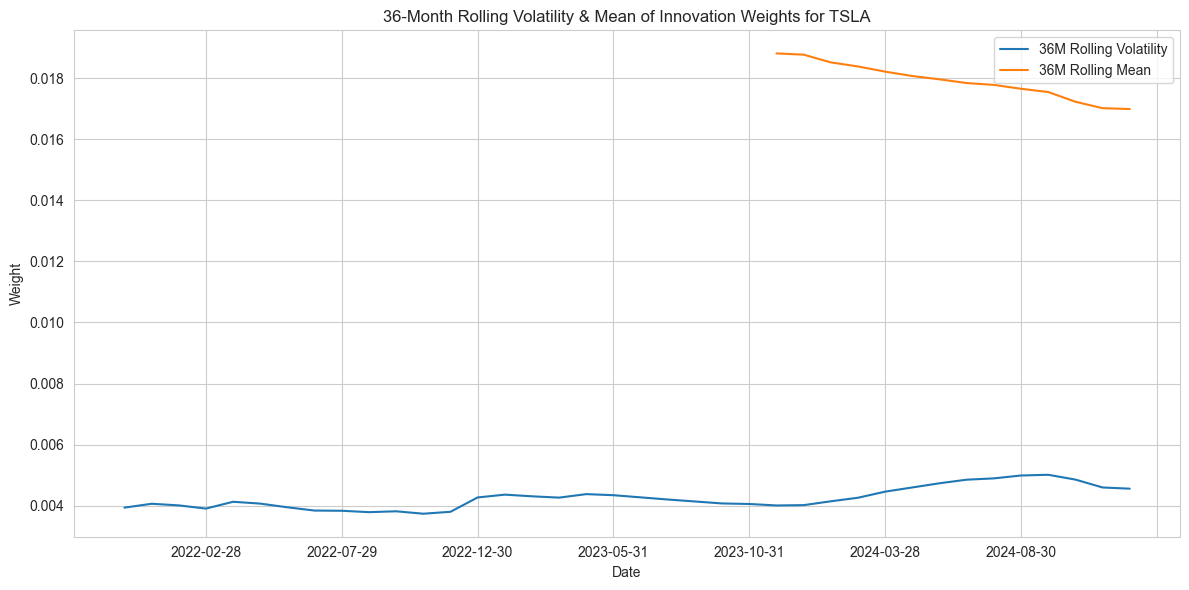

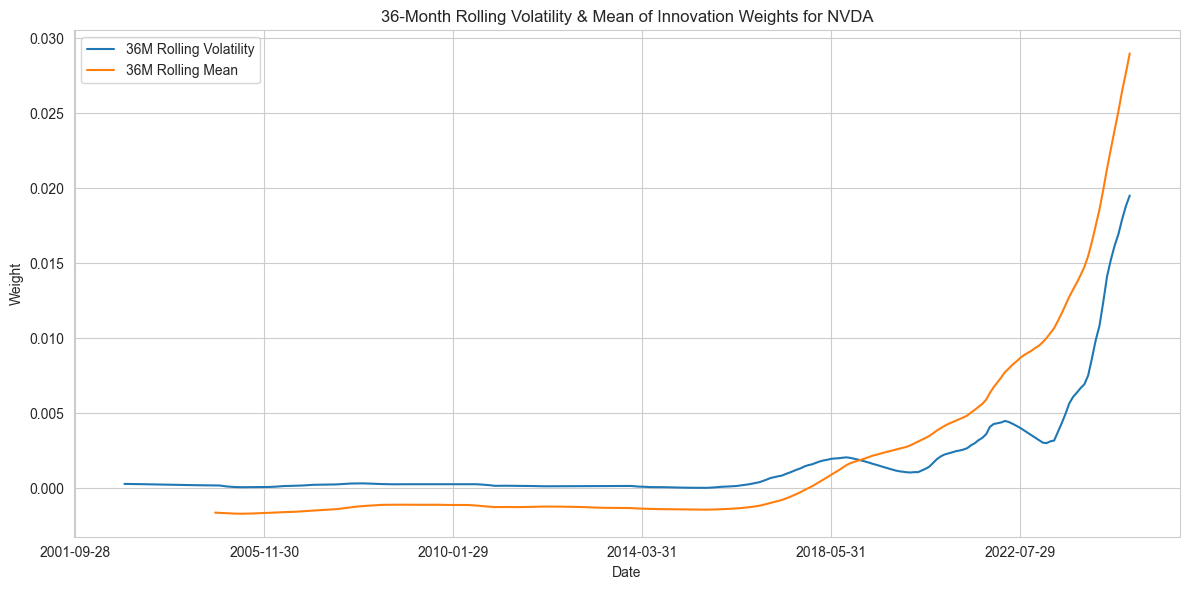

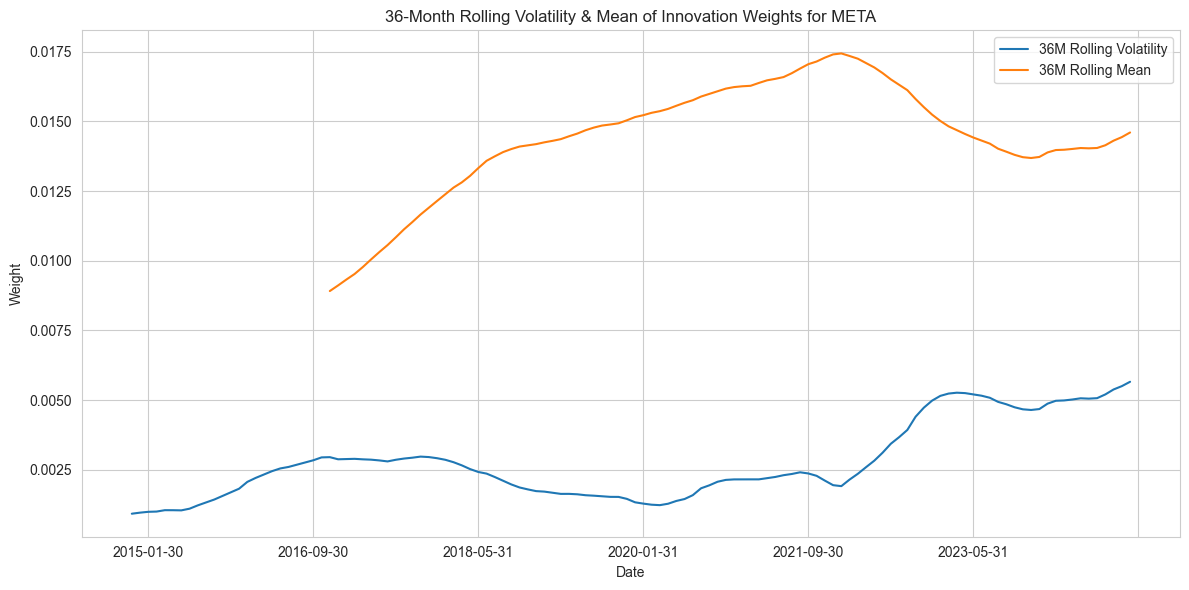

In [214]:
import matplotlib.pyplot as plt

# 1️⃣ You already have innovation_weights = weight_data - equal_weight_data

# 2️⃣ Mask out periods where stock is not in index (weight_data == 0 → stock not active)
# This step ensures that weights when stock is not in index (0 cap) are not affecting the rolling std
innovation_weights_masked = innovation_weights.where(weight_data > 0)

# 3️⃣ Compute 36-month rolling std of weights
rolling_weight_vol = innovation_weights_masked.rolling(window=36, min_periods=12).std()
rolling_weight_mean = innovation_weights_masked.rolling(window=36).mean()

# 4️⃣ Plot selected stocks
sample_stocks = ["ELV", "MSFT", "TSLA", "NVDA", "META"]  # adjust to your tickers

for ticker in sample_stocks:
    fig, ax = plt.subplots(figsize=(12, 6))

    rolling_weight_vol[ticker].plot(ax=ax, label='36M Rolling Volatility')
    rolling_weight_mean[ticker].plot(ax=ax, label='36M Rolling Mean')

    ax.set_title(f'36-Month Rolling Volatility & Mean of Innovation Weights for {ticker}')
    ax.set_ylabel('Weight')
    ax.set_xlabel('Date')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()


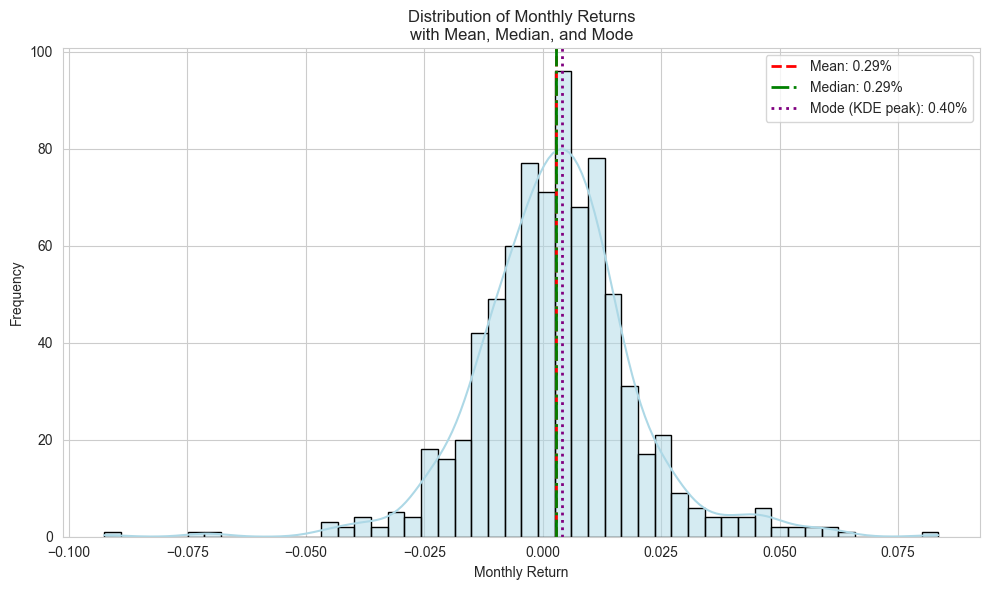

In [215]:
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde


returns_series = innovation_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

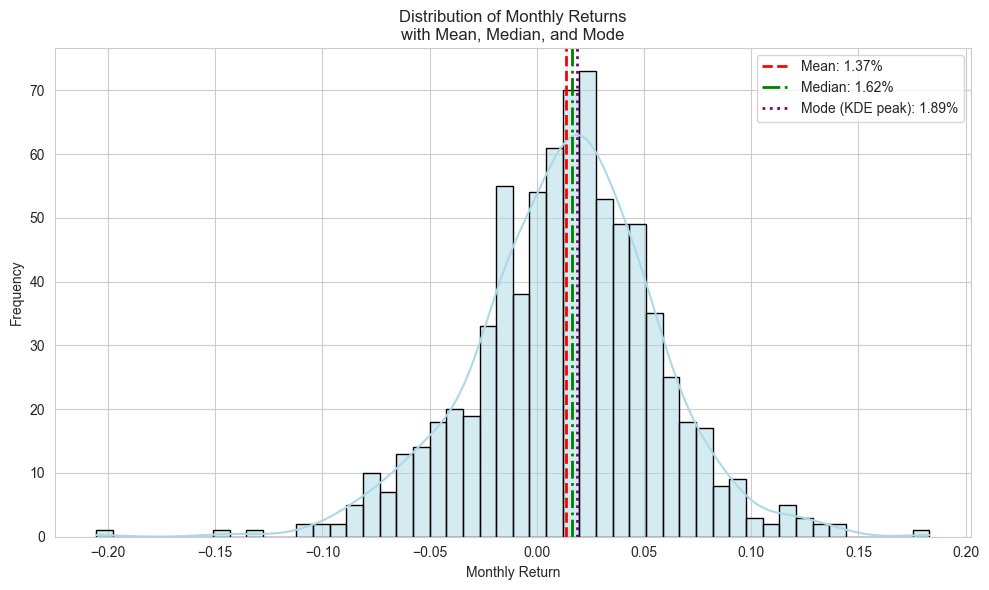

In [216]:
import seaborn as sns


returns_series = sp500_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

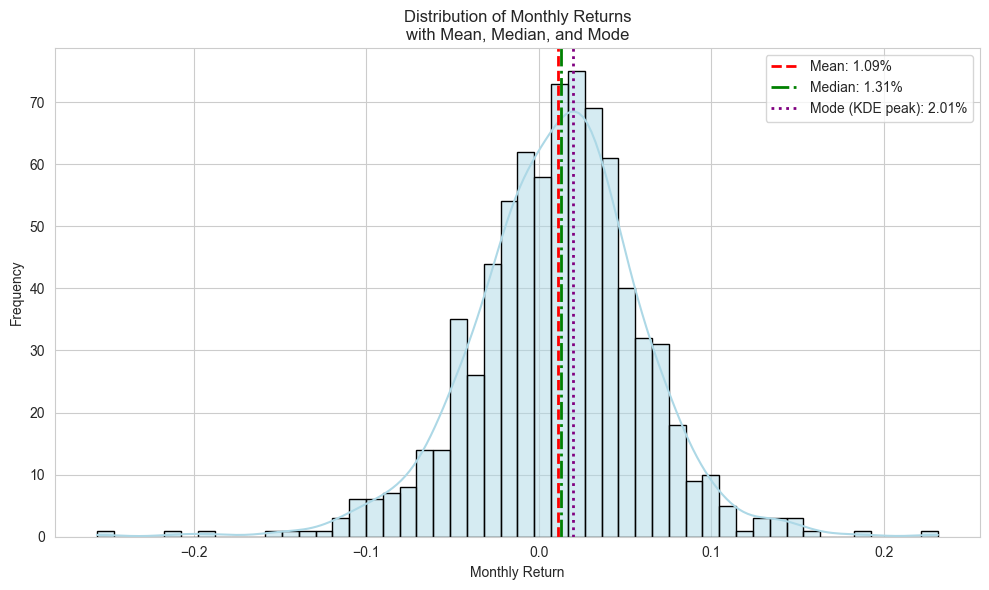

In [217]:
import seaborn as sns


returns_series = sp500_ew_returns.dropna()

mean_val = returns_series.mean()
median_val = returns_series.median()

# Estimate KDE to find mode
kde = gaussian_kde(returns_series)
x_vals = np.linspace(returns_series.min(), returns_series.max(), 1000)
kde_vals = kde(x_vals)
mode_val = x_vals[np.argmax(kde_vals)]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(returns_series, bins=50, kde=True, color='lightblue', edgecolor='black')

# Add lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2%}')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2%}')
plt.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode (KDE peak): {mode_val:.2%}')

# Title
plt.title('Distribution of Monthly Returns\nwith Mean, Median, and Mode')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

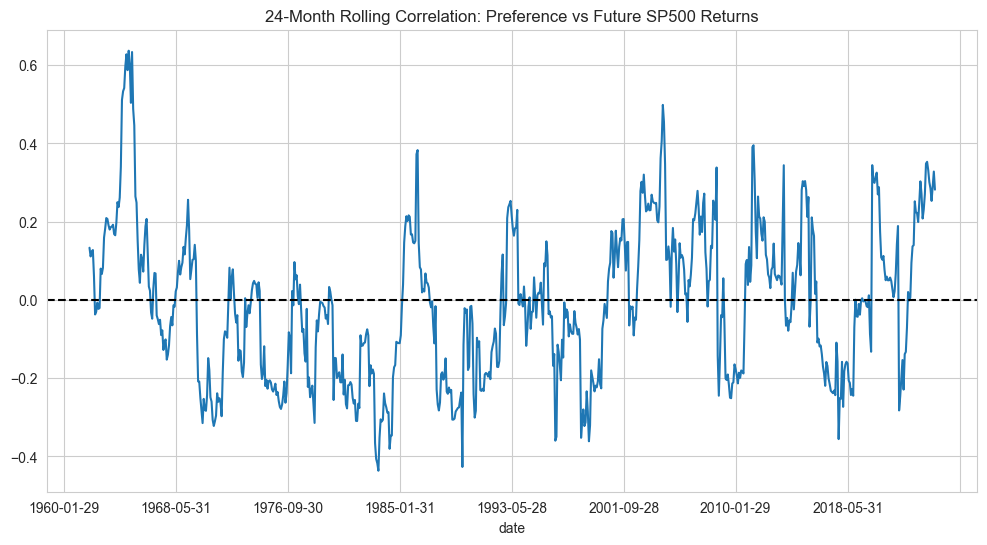

In [218]:
rolling_corr = innovation_returns.rolling(window=24).corr(sp500_returns.shift(-1))  # pref_ret vs next month SP500

rolling_corr.plot(figsize=(12,6), title='24-Month Rolling Correlation: Preference vs Future SP500 Returns')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

In [219]:
import statsmodels.api as sm

X = innovation_returns.shift(1).dropna()
y = sp500_returns.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4266
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.514
Time:                        13:45:25   Log-Likelihood:                 1348.6
No. Observations:                 779   AIC:                            -2693.
Df Residuals:                     777   BIC:                            -2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0140      0.002      8.986      0.0

In [220]:
rolling_mean = innovation_returns.rolling(window=12).mean().shift(1).dropna()
rolling_std = innovation_returns.rolling(window=12).std().shift(1).dropna()

# Build regression dataset
df_reg = pd.DataFrame({
    'future_sp500_ret': sp500_returns.shift(-1),
    'innovation_returns': innovation_returns,
    'pref_mean12': rolling_mean,
    'pref_vol12': rolling_std
}).dropna()

X = df_reg[["innovation_returns"]]
X = sm.add_constant(X)
y = df_reg['future_sp500_ret']

model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       future_sp500_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4521
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.502
Time:                        13:45:25   Log-Likelihood:                 1325.8
No. Observations:                 767   AIC:                            -2648.
Df Residuals:                     765   BIC:                            -2638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0140      0

In [221]:
model2_HAC = model2.get_robustcov_results(cov_type='HAC', maxlags=3)

# Print summary with robust SE
print(model2_HAC.summary())

                            OLS Regression Results                            
Dep. Variable:       future_sp500_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3357
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.562
Time:                        13:45:25   Log-Likelihood:                 1325.8
No. Observations:                 767   AIC:                            -2648.
Df Residuals:                     765   BIC:                            -2638.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0140      0

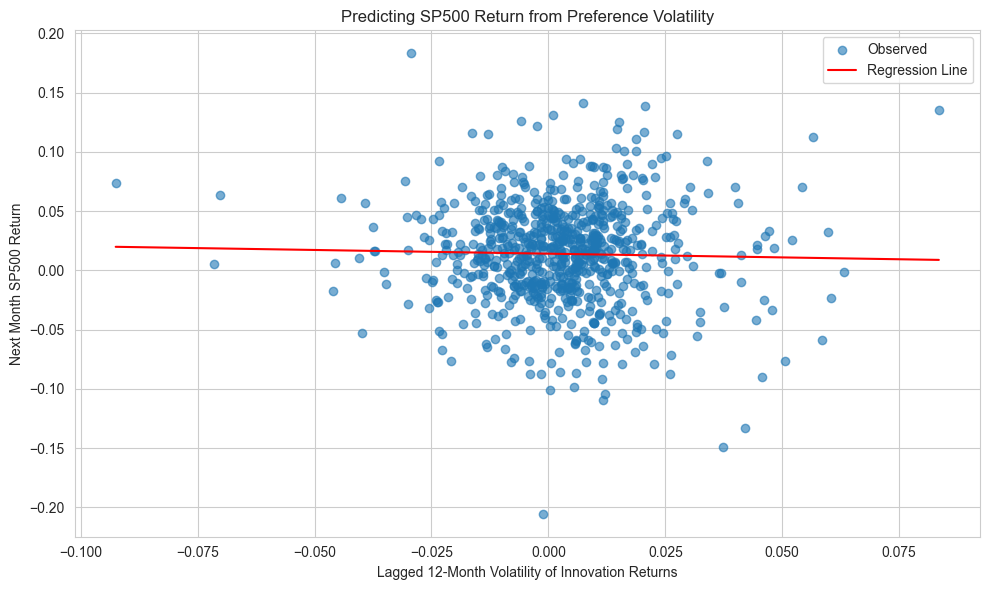

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Get fitted values from model
df_reg['fitted'] = model2.fittedvalues
df_reg['actual'] = y

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_reg['innovation_returns'], df_reg['actual'], alpha=0.6, label='Observed')

# Line of best fit
x_vals = np.linspace(df_reg['innovation_returns'].min(), df_reg['innovation_returns'].max(), 100)
y_vals = model2.params['const'] + model2.params['innovation_returns'] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Lagged 12-Month Volatility of Innovation Returns')
plt.ylabel('Next Month SP500 Return')
plt.title('Predicting SP500 Return from Preference Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [223]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# # Get fitted values and actuals
# df_reg['fitted'] = model2.fittedvalues
# df_reg['actual'] = y
#
# # Compute residuals
# df_reg['residual'] = df_reg['actual'] - df_reg['fitted']
# # Or if you prefer absolute distance
# df_reg['abs_residual'] = np.abs(df_reg['residual'])
#
# # Normalize residuals for coloring
# norm = plt.Normalize(df_reg['abs_residual'].min(), df_reg['abs_residual'].max())
#
# # Scatter plot with color based on how far from regression line (residual size)
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     df_reg['pref_vol12'],
#     df_reg['actual'],
#     c=df_reg['abs_residual'],  # Color by distance from regression line
#     cmap='coolwarm',
#     norm=norm,
#     alpha=0.6,
#     label='Observed'
# )
#
# # Line of best fit
# x_vals = np.linspace(df_reg['pref_vol12'].min(), df_reg['pref_vol12'].max(), 100)
# y_vals = model2.params['const'] + model2.params['pref_vol12'] * x_vals
# plt.plot(x_vals, y_vals, color='black', label='Regression Line')
#
# # Add color bar
# cbar = plt.colorbar(scatter)
# cbar.set_label('Distance from Regression Line (|Residual|)')
#
# # Labels and title
# plt.xlabel('Lagged 12-Month Volatility of Innovation Returns')
# plt.ylabel('Next Month SP500 Return')
# plt.title('Predicting SP500 Return from Preference Volatility\nColored by Distance from Regression Line')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [224]:
aapl = data["AAPL"]
aapl

date
1960-01-29         NaN
1960-02-29         NaN
1960-03-31         NaN
1960-04-29         NaN
1960-05-31         NaN
1960-06-30         NaN
1960-07-29         NaN
1960-08-31         NaN
1960-09-30         NaN
1960-10-31         NaN
1960-11-30         NaN
1960-12-30         NaN
1961-01-31         NaN
1961-02-28         NaN
1961-03-30         NaN
1961-04-28         NaN
1961-05-31         NaN
1961-06-30         NaN
1961-07-31         NaN
1961-08-31         NaN
1961-09-29         NaN
1961-10-31         NaN
1961-11-30         NaN
1961-12-29         NaN
1962-01-31         NaN
1962-02-28         NaN
1962-03-30         NaN
1962-04-30         NaN
1962-05-31         NaN
1962-06-29         NaN
1962-07-31         NaN
1962-08-31         NaN
1962-09-28         NaN
1962-10-31         NaN
1962-11-30         NaN
1962-12-31         NaN
1963-01-31         NaN
1963-02-28         NaN
1963-03-29         NaN
1963-04-30         NaN
1963-05-31         NaN
1963-06-28         NaN
1963-07-31         NaN
1963-0

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.010
Date:                Fri, 27 Jun 2025   Prob (F-statistic):             0.0918
Time:                        13:45:26   Log-Likelihood:                 43.714
No. Observations:                  36   AIC:                            -83.43
Df Residuals:                      34   BIC:                            -80.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.013      0.251      0.8

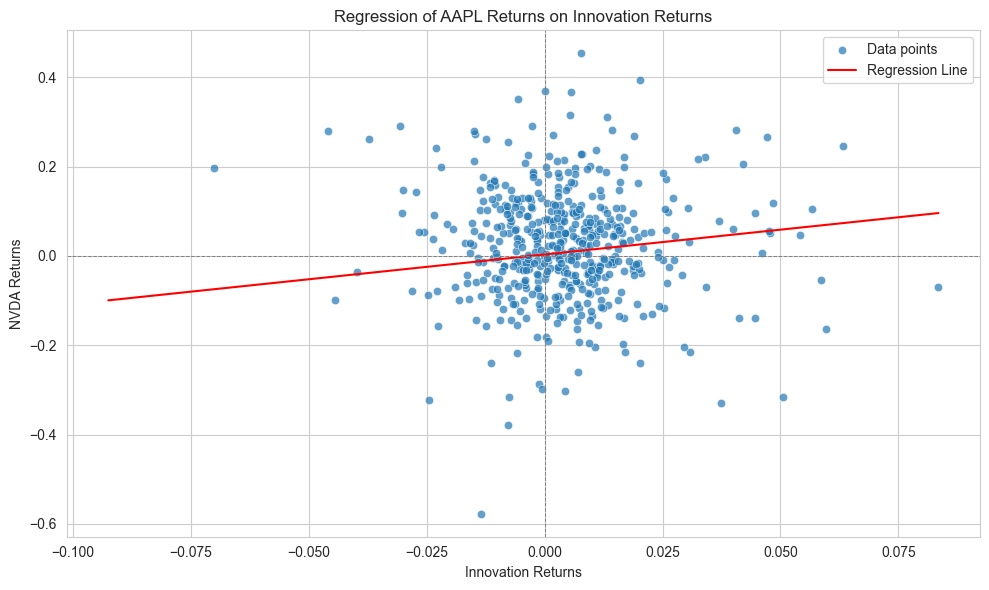

In [225]:
start_date = "2022-01-01"

X = innovation_returns[innovation_returns.index > start_date]
X = sm.add_constant(X)  # adds intercept term
y = aapl[aapl.index > start_date]

# Run regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=innovation_returns, y=aapl, label='Data points', alpha=0.7)

# Plot regression line
x_vals = pd.Series(sorted(innovation_returns))
y_pred = model.predict(sm.add_constant(x_vals))
plt.plot(x_vals, y_pred, color='red', label='Regression Line')

# Labels and styling
plt.title('Regression of AAPL Returns on Innovation Returns')
plt.xlabel('Innovation Returns')
plt.ylabel('NVDA Returns')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [227]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm

# Assumptions:
# - `data` is a DataFrame of monthly returns, columns = tickers, index = datetime
# - `innovation_returns` is a Series of monthly returns with same index
# - Returns are already log returns or % changes

window = 24  # 24 months
min_obs = 20  # Minimum required data points for a valid regression
results = []

# Loop through each ticker
for ticker in tqdm(data.columns):
    stock_returns = data[ticker]

    # Identify contiguous non-NaN blocks (i.e., when the stock was actively trading)
    is_not_nan = stock_returns.notna()
    blocks = (is_not_nan != is_not_nan.shift()).cumsum()

    for block_id in blocks[is_not_nan].unique():
        block_mask = blocks == block_id
        block_data = stock_returns[block_mask]

        # Only proceed if block is long enough for a rolling regression
        if len(block_data) < window:
            continue

        # Do rolling regression for this block
        for i in range(window, len(block_data) + 1):
            y = block_data.iloc[i - window:i]
            X = pd.DataFrame({
                "equal_weight": sp500_ew_returns.loc[y.index],
                "innovation": innovation_returns.loc[y.index]
            })


            x_cum_return = (1 + X).prod() - 1  # Or: np.cumprod(1 + X).iloc[-1] - 1
            y_cum_return = (1 + y).prod() - 1

            if y.isna().any() or X.isna().any().any():

                continue  # Skip if any NaNs in this window

            X_reg = sm.add_constant(X)
            model = sm.OLS(y, X_reg).fit()
            try:
                weight = innovation_weights.loc[y.index[-1], ticker]
            except KeyError:
                weight = np.nan

            result = {
                'date': y.index[-1],
                'ticker': ticker,
                'alpha': model.params['const'],
                'beta_ew': model.params['equal_weight'],
                'beta_innovation': model.params['innovation'],
                'r2': model.rsquared,
                'pval_ew': model.pvalues['equal_weight'],
                'pval_innovation': model.pvalues['innovation'],
                'tstat_ew': model.tvalues['equal_weight'],
                'tstat_innovation': model.tvalues['innovation'],
                'n_obs': int(model.nobs),
                'innovation_weight': innovation_weights.loc[y.index[-1], ticker] if ticker in innovation_weights.columns else np.nan,
                'x_cum_return_ew': (1 + X['equal_weight']).prod() - 1,
                'x_cum_return_innovation': (1 + X['innovation']).prod() - 1,
                'y_cum_return': (1 + y).prod() - 1
            }
            results.append(result)

# Convert to DataFrame
regression_df = pd.DataFrame(results)
regression_df = regression_df.set_index(['date', 'ticker']).sort_index()

# Preview
print(regression_df.head())
# regression_df.to_csv("rolling_regression_results.csv")

100%|██████████| 1863/1863 [08:24<00:00,  3.70it/s]


                      alpha   beta_ew  beta_innovation        r2   pval_ew  \
date       ticker                                                            
1961-12-29 A      -0.012710  1.271257        -1.946735  0.614344  0.000165   
           AAL    -0.011348  1.463663        -0.466976  0.320537  0.008046   
           ABA    -0.000850  0.088562         0.081123  0.003672  0.783590   
           ABG     0.001804  0.749904         1.916004  0.058079  0.321444   
           ABK    -0.002385  0.775882        -0.951601  0.493694  0.001198   

                   pval_innovation  tstat_ew  tstat_innovation  n_obs  \
date       ticker                                                       
1961-12-29 A              0.047571  4.572220         -2.104330     24   
           AAL            0.781674  2.927535         -0.280717     24   
           ABA            0.939678  0.278187          0.076586     24   
           ABG            0.444226  1.015461          0.779771     24   
           ABK 

In [228]:
aapl_df = regression_df.xs('AAPL', level='ticker')
aapl_df

,alpha,beta_ew,beta_innovation,r2,pval_ew,pval_innovation,tstat_ew,tstat_innovation,n_obs,innovation_weight,x_cum_return_ew,x_cum_return_innovation,y_cum_return
date,,,,,,,,,,,,,
1984-10-31,-0.023491,1.598965,4.925447,0.115199,1.475424e-01,1.649724e-01,1.503729,1.438705,24,-0.000738,0.432867,0.057656,-0.019706
1984-11-30,-0.026818,1.296982,4.932215,0.111472,2.138582e-01,1.388438e-01,1.281877,1.538563,24,-0.000724,0.347607,0.060937,-0.223531
1984-12-31,-0.018869,1.411518,5.294536,0.124057,1.820703e-01,1.189197e-01,1.380108,1.625738,24,-0.000527,0.359881,0.056388,-0.025106
1985-01-31,-0.025948,1.027448,4.384044,0.097767,2.643113e-01,1.555189e-01,1.146929,1.473237,24,-0.000630,0.437983,0.035705,-0.290521
1985-02-28,-0.038901,0.999350,4.628796,0.103890,2.771578e-01,1.383794e-01,1.115694,1.540472,24,-0.000842,0.394882,0.054041,-0.457536
1985-03-29,-0.041446,1.031233,4.381111,0.094454,2.679145e-01,1.669883e-01,1.138057,1.431550,24,-0.000949,0.321893,0.075427,-0.476333
1985-04-30,-0.040166,0.622589,3.156451,0.042880,5.394438e-01,3.432171e-01,0.623851,0.969733,24,-0.000983,0.222505,0.074997,-0.579209
1985-05-31,-0.083735,1.122637,7.835620,0.180994,2.467812e-01,4.708819e-02,1.191418,2.109375,24,-0.001210,0.270923,0.105554,-0.699135
1985-06-28,-0.084886,1.589830,9.752952,0.252946,1.026929e-01,1.521994e-02,1.706334,2.642697,24,-0.001181,0.249700,0.097424,-0.631714


In [200]:
# import matplotlib.pyplot as plt
# import pandas as pd
#
# # Prepare data
# aapl_returns = data['AAPL'].dropna()
# aapl_cum_return = (1 + aapl_returns).cumprod()
#
# # Assume aapl_df has 'beta' and datetime index; aapl_returns is a Series with datetime index
#
# # Align indices
# common_index = aapl_df.index.intersection(aapl_cum_return.index)
# aapl_df = aapl_df.loc[common_index]
# aapl_cum_return = aapl_cum_return.loc[common_index]
#
# # Convert indices to datetime if not already
# aapl_df.index = pd.to_datetime(aapl_df.index)
# aapl_cum_return.index = pd.to_datetime(aapl_cum_return.index)
#
# # Define function to split into 4-year periods
# def split_into_periods(df, period_years=4):
#     periods = []
#     start_year = df.index[0].year
#     end_year = df.index[-1].year
#
#     for start in range(start_year, end_year + 1, period_years):
#         end = start + period_years - 1
#         mask = (df.index.year >= start) & (df.index.year <= end)
#         periods.append((start, end, df.loc[mask]))
#     return periods
#
# # Split dataframes into 4-year periods
# beta_periods = split_into_periods(aapl_df[['beta']])
# cumret_periods = split_into_periods(aapl_cum_return.to_frame(name='cum_return'))
#
# # Plot each period separately
# for (start_b, end_b, beta_data), (start_c, end_c, cumret_data) in zip(beta_periods, cumret_periods):
#     fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
#
#     ax1.plot(beta_data.index, beta_data['beta'], label='Rolling Beta', color='blue')
#     ax1.set_ylabel('Rolling Beta')
#     ax1.set_title(f'AAPL Rolling Beta ({start_b} - {end_b})')
#
#     ax2.plot(cumret_data.index, cumret_data['cum_return'], label='Cumulative Return', color='green')
#     ax2.set_ylabel('Cumulative Return')
#     ax2.set_title(f'AAPL Cumulative Return ({start_c} - {end_c})')
#     ax2.set_xlabel('Date')
#
#     plt.tight_layout()
#     plt.show()
#
#


In [201]:
# # Get the raw return series
# aapl_returns = data["AAPL"]
#
# # Match the forward returns (e.g., 1-month ahead return)
# aapl_df['forward_return'] = aapl_returns.shift(-1).reindex(aapl_df.index).values
#
# plt.figure(figsize=(10, 6))
# plt.scatter(aapl_df['beta'], aapl_df['forward_return'], alpha=0.6)
# plt.xlabel('Rolling Beta to Innovation Factor')
# plt.ylabel('1-Month Forward AAPL Return')
# plt.title('Does Beta Predict Forward AAPL Returns?')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [202]:
# aapl_df['predicted'] = aapl_df['alpha'] + aapl_df['beta'] * aapl_df['x_cum_return']
# aapl_df['rolling_corr'] = aapl_df['predicted'].rolling(12).corr(aapl_df['forward_return'])
#
# aapl_df['rolling_corr'].plot(figsize=(10, 5), title='Rolling Correlation: Predicted vs Forward AAPL Return')
# plt.axhline(0, color='gray', linestyle='--')
# plt.grid(True)
# plt.show()


date
1960-01-29   -0.018005
1960-02-29    0.009621
1960-03-31    0.015161
1960-04-29    0.002178
1960-05-31    0.012071
1960-06-30    0.004346
1960-07-29   -0.002205
1960-08-31   -0.000778
1960-09-30    0.003733
1960-10-31    0.012521
1960-11-30    0.001252
1960-12-30    0.012347
1961-01-31   -0.011278
1961-02-28   -0.020511
1961-03-30   -0.004048
1961-04-28    0.006801
1961-05-31   -0.016652
1961-06-30    0.011829
1961-07-31    0.017792
1961-08-31   -0.000192
1961-09-29    0.009934
1961-10-31    0.008856
1961-11-30    0.006610
1961-12-29    0.008722
1962-01-31   -0.022066
1962-02-28    0.007999
1962-03-30    0.005930
1962-04-30    0.007974
1962-05-31    0.011759
1962-06-29    0.002693
1962-07-31    0.010418
1962-08-31    0.001549
1962-09-28    0.011543
1962-10-31    0.018697
1962-11-30   -0.021955
1962-12-31    0.021104
1963-01-31   -0.021417
1963-02-28   -0.009426
1963-03-29    0.013515
1963-04-30    0.004969
1963-05-31   -0.010729
1963-06-28   -0.002095
1963-07-31    0.010777
1963-0